In [2]:
!pip install gradio

In [19]:
# Import libraries

import os
import cv2
import numpy as np
import tensorflow as tf
import gradio as gr
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [20]:
cat_folder = '/kaggle/input/dog-and-cat-classification-dataset/PetImages/Cat'
dog_folder = '/kaggle/input/dog-and-cat-classification-dataset/PetImages/Dog'

# Example: listing a few files
print("Cat files:", os.listdir(cat_folder)[:5])
print("Dog files:", os.listdir(dog_folder)[:5])

Cat files: ['7981.jpg', '6234.jpg', '1269.jpg', '3863.jpg', '6241.jpg']
Dog files: ['7981.jpg', '6234.jpg', '1269.jpg', '3863.jpg', '6241.jpg']


In [21]:
# Set image dimensions and batch size
img_size = (224, 224)
batch_size = 32

# Dataset base directory (adjust only if yours is different)
base_dir = '/kaggle/input/dog-and-cat-classification-dataset/PetImages'

In [22]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)
print("ImageDataGenerator created")

ImageDataGenerator created


In [23]:
# Training data generator
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'         # Use 80% of data for training
)

# Validation data generator
val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'       # Use 20% of data for validation
)

Found 20000 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.


In [24]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary output: cat or dog
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       9,437,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,679,041 (36.92 MB)

 Trainable params: 9,679,041 (36.92 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    verbose=2
)

Epoch 1/10
625/625 - 68s - 108ms/step - accuracy: 0.6385 - loss: 0.6246 - val_accuracy: 0.7239 - val_loss: 0.5322
Epoch 2/10
625/625 - 60s - 96ms/step - accuracy: 0.7561 - loss: 0.5033 - val_accuracy: 0.7975 - val_loss: 0.4353
Epoch 3/10
625/625 - 63s - 101ms/step - accuracy: 0.8179 - loss: 0.4025 - val_accuracy: 0.8187 - val_loss: 0.4037
Epoch 4/10
625/625 - 60s - 96ms/step - accuracy: 0.8579 - loss: 0.3272 - val_accuracy: 0.8579 - val_loss: 0.3311
Epoch 5/10
625/625 - 63s - 100ms/step - accuracy: 0.8903 - loss: 0.2539 - val_accuracy: 0.8645 - val_loss: 0.3211
Epoch 6/10
625/625 - 61s - 97ms/step - accuracy: 0.9313 - loss: 0.1708 - val_accuracy: 0.8627 - val_loss: 0.3659
Epoch 7/10
625/625 - 62s - 100ms/step - accuracy: 0.9589 - loss: 0.1066 - val_accuracy: 0.8617 - val_loss: 0.4116
Epoch 8/10
625/625 - 62s - 100ms/step - accuracy: 0.9790 - loss: 0.0583 - val_accuracy: 0.8569 - val_loss: 0.5145
Epoch 9/10
625/625 - 63s - 101ms/step - accuracy: 0.9857 - loss: 0.0434 - val_accuracy: 0.8

In [26]:
loss, accuracy = model.evaluate(val_generator, verbose=2)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

157/157 - 15s - 97ms/step - accuracy: 0.8617 - loss: 0.7049
Validation Loss: 0.7049
Validation Accuracy: 0.8617


In [30]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [31]:
cm = confusion_matrix(true_labels, pred_labels)

print("Confusion Matrix:")
print(cm)

# Optional: classification report
print("\nClassification Report:")
print(classification_report(true_labels, pred_labels, target_names=["Cat", "Dog"]))


Confusion Matrix:
[[1255 1244]
 [1223 1276]]

Classification Report:
              precision    recall  f1-score   support

         Cat       0.51      0.50      0.50      2499
         Dog       0.51      0.51      0.51      2499

    accuracy                           0.51      4998
   macro avg       0.51      0.51      0.51      4998
weighted avg       0.51      0.51      0.51      4998



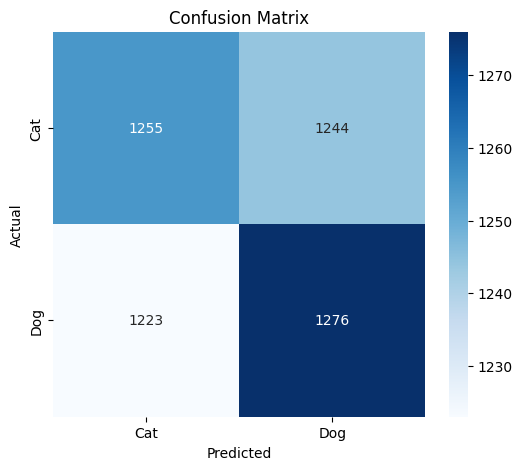

In [32]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Cat", "Dog"], yticklabels=["Cat", "Dog"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [17]:
def predict_cat_dog(img):
    # Preprocess the image
    img = cv2.resize(img, (224, 224))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    # Make the prediction
    prediction = model.predict(img)

    # Interpret the prediction
    if prediction > 0.5:
        return "Prediction: Dog"
    else:
        return "Prediction: Cat"


# Create the Gradio interface
iface = gr.Interface(
    fn=predict_cat_dog,          # The function to call for prediction
    inputs=gr.Image(type="numpy"), # Input component: Image upload, passed as a NumPy array
    outputs="text",              # Output component: Text to display the prediction
    title="Cat and Dog Image Classifier",
    description="Upload an image to classify it as a cat or a dog."
)

# Launch the interface
iface.launch(inline=True)

* Running on local URL:  http://127.0.0.1:7860
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

* Running on public URL: https://115243e932110d3f50.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
